In [1]:
import json
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import urllib3
urllib3.disable_warnings()
import warnings
warnings.filterwarnings('ignore')

API_KEY = 'RIWOMQAIJJ40V284'

plt.style.use('seaborn')

In [2]:
def draw_candle(candle):
    x = candle.index[0]
    o = candle.values[0][0]
    h = candle.values[0][1]
    l = candle.values[0][2]
    c = candle.values[0][3]
    color = 'green' if o <= c else 'red'
    plt.plot([x, x], [h, l], color=color, linewidth=1)
    plt.plot([x, x], [o, c], color=color, linewidth=4)
    plt.xticks(rotation='vertical')

In [3]:
sym = 'SBER.MOS'
http = urllib3.PoolManager()
r = http.request('GET',
                 'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=' + sym + '&apikey=' + API_KEY)
df = pd.DataFrame.from_dict(json.loads(r.data)['bestMatches'])
df

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,SBER.MOS,Sberbank of Russia,Equity,Moscow,10:00,18:45,UTC+03,RUB,1.0000


In [4]:
sym = df.iloc[0, 0]
http = urllib3.PoolManager()
r = http.request('GET', 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=' + sym +
                 '&outputsize=full&apikey=' + API_KEY)

In [5]:
data = pd.DataFrame.from_dict(json.loads(r.data)['Monthly Time Series'], orient='index', dtype=float)
data.rename(lambda x: x.split('. ')[1], axis='columns', inplace=True)

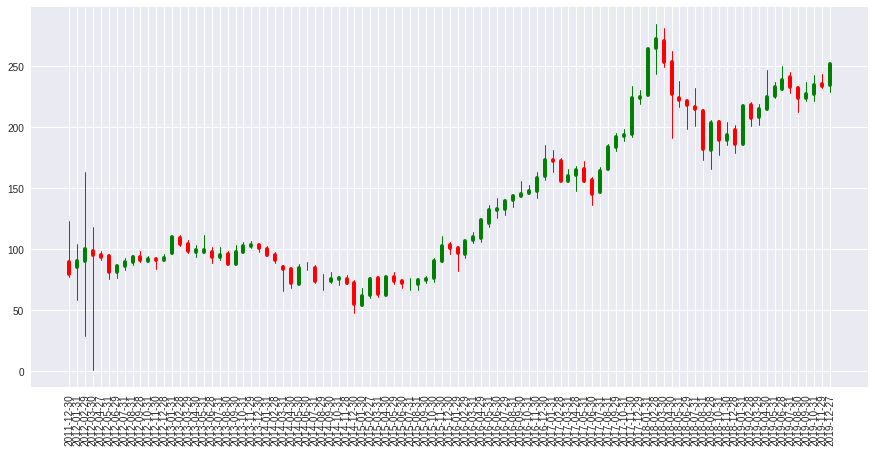

In [6]:
start, end = 0, data.shape[0]

fig = plt.figure(figsize=(15, 7))

for i in range(start, end):
    draw_candle(data[i:i+1])

In [7]:
data['lead'] = 0
data['lead'][1:] = data.close[:-1]
x = (data.close[1:] - data.lead[1:]) / data.lead[1:] * 100

In [8]:
print('Mean: {}'.format(x.mean()))
print('Std: {}'.format(x.std()))

Mean: 1.5736599622574243
Std: 8.622265247027293


In [9]:
x / x.std()

2012-01-31    1.573163
2012-02-29    1.237347
2012-03-30   -0.540436
2012-04-27   -0.165788
2012-05-31   -1.518682
2012-06-29    0.697296
2012-07-31    0.447002
2012-08-31    0.448508
2012-09-28   -0.275014
2012-10-31    0.101971
2012-11-30   -0.048014
2012-12-28    0.194123
2013-01-31    2.077735
2013-02-28   -0.531265
2013-03-29   -0.633297
2013-04-30    0.029329
2013-05-31   -0.007021
2013-06-28   -0.628780
2013-07-31    0.191895
2013-08-30   -0.852517
2013-09-30    1.244837
2013-10-31    0.605416
2013-11-29    0.053025
2013-12-30   -0.249320
2014-01-31   -0.717335
2014-02-28   -0.452660
2014-03-31   -0.929358
2014-04-30   -1.563915
2014-05-30    1.919649
2014-06-30    0.000000
                ...   
2017-07-31    1.508784
2017-08-31    1.337919
2017-09-29    0.557426
2017-10-31    0.088644
2017-11-30    1.828252
2017-12-29    0.043941
2018-01-31    2.023964
2018-02-28    0.346402
2018-03-30   -0.801718
2018-04-30   -1.215726
2018-05-31   -0.236566
2018-06-29   -0.227409
2018-07-31 

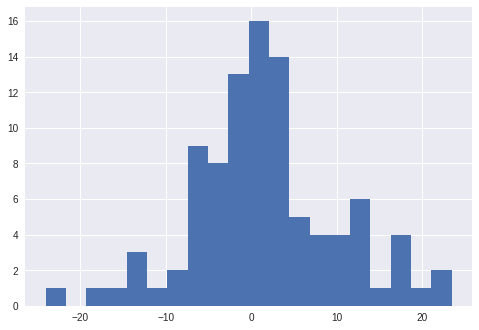

In [19]:
x.hist(bins=20)

In [18]:
stats.t.interval(0.95, len(x)-1, loc=x.mean(), scale=x.std())

(-15.543700771070045, 18.691020695584893)

In [80]:
stats.t.interval(0.95, len(x)-1, loc=x.mean())

(-0.4115910411525019, 3.5589109656673505)

In [81]:
stats.t.ppf(0.975, len(x)-1, loc=x.mean(), scale=x.std())

18.691020695584893

In [82]:
x.mean() / x.std()

0.182511198295596

In [15]:
x.mean() + stats.t.ppf(0.975, df=len(x)-1) * x.std()

18.691020695584893

In [16]:
x.mean() + stats.t.ppf(0.025, df=len(x)-1) * x.std()

-15.543700771070048